In [17]:
graph = {
        'a' : ['b', 'c'],
        'b' : ['a', 'c', 'd'],
        'c' : ['a','b', 'd','e'],
        'd' : ['b' , 'c', 'e', 'f'],
        'e' : ['c', 'd'],
        'f' : ['d']
        }


def BFS(graph, s):
    queue = []
    queue.append(s)
    seen = set()
    seen.add(s)
    while len(queue) > 0:
        vertex = queue.pop(0)
        nodes = graph[vertex]
        for node in nodes:
            if node not in seen:
                queue.append(node)
                seen.add(node)
        print(vertex)
        
BFS(graph, 'a')

a
b
c
d
e
f


In [21]:
def bfs_recursive(graph, root):  
    nodes=list(graph.keys())
    visited = set()  
    levels = [[root]]  # 初始化层级列表，第一层只有一个根节点  
    next_level=[]
    def process_level(level):  
        if not level:  
            return  # 当前层级为空，返回上一层  
        for node in level:  
            if node not in visited:  
                visited.add(node)  
                print(node, end=" ")  
                # 将未访问的邻居加入下一层级的列表  
                next_level.extend(neighbour for neighbour in graph[node] if neighbour not in visited)  
  
        # 如果还有下一层级，递归处理  
        if next_level:  
            if set(nodes)==visited:
                return
            levels.append(next_level)
            process_level(next_level)  
    # 递归处理每一层  
    while levels:  
        process_level(levels.pop(0))  

  
bfs_recursive(graph, 'a')  # 输出: A B C D E F

a b c d e f 

In [16]:
def bfs_recursive(graph, root):  
    visited = set()  
    levels = [[root]]  # 初始化层级列表，第一层只有一个根节点  
      
    def process_level(level):  
        if not level:  
            return  # 当前层级为空，返回上一层  
  
        next_level = []  # 下一层级的节点列表  
  
        for node in level:  
            if node not in visited:  
                visited.add(node)  
                print(node, end=" ")  
                # 将未访问的邻居加入下一层级的列表  
                next_level.extend(neighbour for neighbour in graph[node] if neighbour not in visited)  
  
        # 如果还有下一层级，递归处理  
        if next_level:  
            levels.append(next_level)  # 将下一层级添加到列表中  
            process_level(next_level)  
  
    # 递归处理每一层  
    while levels:  
        process_level(levels.pop(0))  
  
# 示例图  
graph = {  
    'A': ['B', 'C'],  
    'B': ['D', 'E'],  
    'C': ['F'],  
    'D': [],  
    'E': ['F'],  
    'F': []  
}  
  
bfs_recursive(graph, 'A')  # 输出: A B C D E F

A B C D E F 

In [13]:
def DFS(graph, s):
    stack = []
    stack.append(s)
    seen = set()
    seen.add(s)
    while len(stack) > 0:
        vertex = stack.pop()
        nodes  = graph[vertex]
        for node in nodes:
            if node not in seen:
                stack.append(node)
                seen.add(node)
        print(vertex)
DFS(graph, 'a')

a
c
e
d
f
b


In [14]:
def DFS1(graph, s, stack=[]):
    stack.append(s)
    for i in graph[s]:
        if i not in stack:
            DFS1(graph, i, stack)
    return stack
print(DFS1(graph, 'a'))

['a', 'b', 'c', 'd', 'e', 'f']


In [25]:
import networkx as nx  # 导入 NetworkX 工具包

G = nx.Graph()  # 创建：空的 无向图
G.add_weighted_edges_from([(1,2,50),(1,3,60),(2,4,65),(2,5,40),(3,4,52),
                (3,7,45),(4,5,50),(4,6,30),(4,7,42),(5,6,70)])  # 向图中添加多条赋权边: (node1,node2,weight)
list(nx.dfs_edges(G,1))

[(1, 2), (2, 4), (4, 3), (3, 7), (4, 5), (5, 6)]

In [26]:
list(nx.bfs_edges(G,1))

[(1, 2), (1, 3), (2, 4), (2, 5), (3, 7), (4, 6)]

In [10]:
class DFS_hungary():
    # 参数初始化
    def __init__(self, set_A, set_B, edge, cx, cy, visited):
        self.set_A, self.set_B = set_A, set_B  # 顶点集合
        self.edge = edge  # 顶点是否连边
        self.cx, self.cy = cx, cy  # 顶点是否匹配
        self.visited = visited  # 顶点是否被访问
        self.M = []  # 匹配
        self.res = 0  # 匹配数
    # 遍历顶点A集合，得到最大匹配
    def max_match(self):
        for i in self.set_A:
            if self.cx[i] == -1:  # 未匹配
                for key in self.set_B:  # 将visited置0表示未访问过
                    self.visited[key] = 0
                self.res += self.path(i)
                print('i', i, 'M',self.M)
    # 增广路置换获得更大的匹配
    def path(self, u):
        for v in self.set_B:
            if self.edge[u][v] and (not self.visited[v]):  # 如果可连且未被访问过
                self.visited[v] = 1 # 访问该顶点
                if self.cy[v] == -1:  # 如果未匹配， 则建立匹配
                    self.cx[u], self.cy[v] = v, u
                    self.M.append((u, v))
                    return 1
                else:
                    self.M.remove((self.cy[v], v))  # 如果匹配则删除之前的匹配
                    if self.path(self.cy[v]):  # 递归调用
                        self.cx[u], self.cy[v] = v, u
                        self.M.append((u, v))
                        return 1
            print('v', v, 'M', self.M)
        return 0
if __name__ == '__main__':
    set_A, set_B = ['A', 'B', 'C', 'D'], ['E', 'F', 'G', 'H']
    edge = {'A': {'E': 1, 'F': 0, 'G': 1, 'H': 0}, 'B': {'E': 0, 'F': 1, 'G': 0, 'H': 1},
            'C': {'E': 1, 'F': 0, 'G': 0, 'H': 1}, 'D': {'E': 0, 'F': 0, 'G': 1, 'H': 0}}  # 1表示可以匹配，0表示不能匹配
    cx, cy = {'A': -1, 'B': -1, 'C': -1, 'D': -1}, {'E': -1, 'F': -1, 'G': -1, 'H': -1}
    visited = {'E': 0, 'F': 0, 'G': 0, 'H': 0}
    dh = DFS_hungary(set_A, set_B, edge, cx, cy, visited)
    dh.max_match()
    print('res', dh.res)
    print('cx', cx)
    print('cy', cy)
    print('visited', visited)

i A M [('A', 'E')]
v E M [('A', 'E')]
i B M [('A', 'E'), ('B', 'F')]
v E M [('B', 'F')]
v F M [('B', 'F')]
i C M [('B', 'F'), ('A', 'G'), ('C', 'E')]
v E M [('B', 'F'), ('A', 'G'), ('C', 'E')]
v F M [('B', 'F'), ('A', 'G'), ('C', 'E')]
v E M [('B', 'F')]
v F M [('B', 'F')]
v G M [('B', 'F')]
i D M [('B', 'F'), ('C', 'H'), ('A', 'E'), ('D', 'G')]
res 4
cx {'A': 'E', 'B': 'F', 'C': 'H', 'D': 'G'}
cy {'E': 'A', 'F': 'B', 'G': 'D', 'H': 'C'}
visited {'E': 1, 'F': 0, 'G': 1, 'H': 1}


In [11]:
"""
KM算法
复杂度O(E*V*V)
"""
a = -float('inf')
# a = 5
graph = [
    [4, 2, 6, a, a],
    [2, 6, a, 6, 3],
    [a, 3, 6, a, a],
    [a, 8, 2, a, a],
    [a, a, a, 3, 1]
]
label_left, label_right = [max(g) for g in graph], [0 for _ in graph]
S, T = {}, {}

visited_left = [False for _ in graph]
visited_right = [False for _ in graph]
slack_right = [float('inf') for _ in graph]


def find_path(i, visited_left, visited_right, slack_right):
    visited_left[i] = True
    for j, match_weight in enumerate(graph[i]):
        if visited_right[j]:
            continue
        gap = label_left[i] + label_right[j] - match_weight
        if gap == 0:
            visited_right[j] = True
            if j not in T or find_path(T[j], visited_left, visited_right, slack_right):
                T[j] = i
                S[i] = j
                return True

        else:
            slack_right[j] = min(slack_right[j], gap)
    return False

def KM():
    m = len(graph)
    for i in range(m):
        # 重置辅助变量
        slack_right = [float('inf') for _ in range(m)]
        while True:
            visited_left = [False for _ in graph]
            visited_right = [False for _ in graph]
            if find_path(i,visited_left,visited_right, slack_right):
                break
            d = float('inf')
            for j, slack in enumerate(slack_right):
                if not visited_right[j] and slack < d:
                    d = slack
            for k in range(m):
                if visited_left[k]:
                    label_left[k] -= d
                if visited_right[k]:
                    label_right[k] += d
    return S, T

KM()
print(S)


{0: 0, 1: 3, 2: 2, 3: 1, 4: 4}


In [17]:
from heapq import *
def prim(adjacent_dict,start='D'):
    minu_tree = []  # 存储最小生成树结果
    visited = [start] # 存储访问过的顶点，注意指定起始点
    adjacent_vertexs_edges = adjacent_dict[start]
    heapify(adjacent_vertexs_edges) # 转化为小顶堆，便于找到权重最小的边
    while adjacent_vertexs_edges:
        weight, v1, v2 = heappop(adjacent_vertexs_edges) # 权重最小的边，并同时从堆中删除。 
        if v2 not in visited:
            visited.append(v2)  # 在used中有第一选定的点'A'，上面得到了距离A点最近的点'D',举例是5。将'd'追加到used中
            minu_tree.append((weight, v1, v2))
            # 再找与d相邻的点，如果没有在heap中，则应用heappush压入堆内，以加入排序行列
            for next_edge in adjacent_dict[v2]: # 找到v2相邻的边
                if next_edge[2] not in visited: # 如果v2还未被访问过，就加入堆中
                    heappush(adjacent_vertexs_edges, next_edge)
    return minu_tree
adjacent_dict={'A': [(7, 'A', 'B'), (5, 'A', 'D')], 
     'C': [(8, 'C', 'B'), (5, 'C', 'E')], 
     'B': [(7, 'B', 'A'), (8, 'B', 'C'), (9, 'B', 'D'), (7, 'B', 'E')], 
     'E': [(7, 'E', 'B'), (5, 'E', 'C'), (15, 'E', 'D'), (8, 'E', 'F'), (9, 'E', 'G')], 
     'D': [(5, 'D', 'A'), (9, 'D', 'B'), (15, 'D', 'E'), (6, 'D', 'F')], 
     'G': [(9, 'G', 'E'), (11, 'G', 'F')], 
     'F': [(6, 'F', 'D'), (8, 'F', 'E'), (11, 'F', 'G')]}
print(prim(adjacent_dict,start='D'))


[(5, 'D', 'A'), (6, 'D', 'F'), (7, 'A', 'B'), (7, 'B', 'E'), (5, 'E', 'C'), (9, 'E', 'G')]


In [22]:
import heapq  
  
def prim(graph, start):  
    mst = {start: []}  # 最小生成树，初始只包含起始节点  
    visited = {start}  # 已访问的节点集合  
    edges = [(cost, start, to) for to, cost in graph[start].items()]  # 起始节点的边加入堆中  
    heapq.heapify(edges)  # 初始化堆  
  
    while edges:  
        cost, frm, to = heapq.heappop(edges)  # 弹出权重最小的边  
        if to not in visited:  
            visited.add(to)  # 标记节点为已访问  
            mst[to] = []  # 在MST中添加新节点  
            mst[frm].append((cost, to))  # 添加边到MST  
            mst[to].append((cost, frm))  # 由于是无向图，双向添加边  
            for to_next, cost2 in graph[to].items():  
                if to_next not in visited:  
                    heapq.heappush(edges, (cost2, to, to_next))  # 添加相邻节点的边到堆中  
  
    return mst  # 返回最小生成树  
  
# 示例图的邻接表表示  
graph = {  
    'A': {'B': 1, 'C': 4},  
    'B': {'A': 1, 'C': 2, 'D': 5},  
    'C': {'A': 4, 'B': 2, 'D': 1},  
    'D': {'B': 5, 'C': 1}  
}  
  
# 运行Prim算法  
mst = prim(graph, 'A')  
print("Minimum Spanning Tree:", mst)

Minimum Spanning Tree: {'A': [(1, 'B')], 'B': [(1, 'A'), (2, 'C')], 'C': [(2, 'B'), (1, 'D')], 'D': [(1, 'C')]}


In [18]:
# 以全局变量X定义节点集合，即类似{'A':'A','B':'B','C':'C','D':'D'},如果A、B两点连通，则会更改为{'A':'B','B':'B",...},即任何两点连通之后，两点的值value将相同。
X = dict()
R = dict() # 各点的初始等级均为0,如果被做为连接的的末端，则增加1

def make_set(point):
    X[point] = point
    R[point] = 0
def find(point):
    if X[point] != point:
        X[point] = find(X[point])
    return X[point]
def merge(point1, point2):
    '''连接两个分量（节点）
    '''
    r1 = find(point1)
    r2 = find(point2)
    if r1 != r2:
        if R[r1] > R[r2]:
            X[r2] = r1
        else:
            X[r1] = r2
            if R[r1] == R[r2]:
                R[r2] += 1
def kruskal(vertices,edges):
    '''KRUSKAL算法实现
    '''
    for vertice in vertices:
        make_set(vertice)
    minu_tree = []
    edges.sort()  # 按照权重从小到大排序
    for edge in edges:
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            merge(vertice1, vertice2)
            minu_tree.append(edge)
    return minu_tree


vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [(7, 'A', 'B'),
            (5, 'A', 'D'),
            (8, 'B', 'C'),
            (9, 'B', 'D'),
            (7, 'B', 'E'),
            (5, 'C', 'E'),
            (15, 'D', 'E'),
            (6, 'D', 'F'),
            (8, 'E', 'F'),
            (9, 'E', 'G'),
            (11, 'F', 'G'),
            ]
print(kruskal(vertices,edges))


[(5, 'A', 'D'), (5, 'C', 'E'), (6, 'D', 'F'), (7, 'A', 'B'), (7, 'B', 'E'), (9, 'E', 'G')]


In [23]:
def find(parent, i):  
    if parent[i] != i:  
        parent[i] = find(parent, parent[i])  
    return parent[i]  
  
def union(parent, rank, x, y):  
    root_x = find(parent, x)  
    root_y = find(parent, y)  
    if root_x != root_y:  
        if rank[root_x] > rank[root_y]:  
            parent[root_y] = root_x  
        else:  
            parent[root_x] = root_y  
            if rank[root_x] == rank[root_y]:  
                rank[root_y] += 1  
 
def kruskal(graph):  
    edges = []  
    for u in graph:  
        for v, w in graph[u].items():  
            edges.append((w, u, v))  
    edges.sort()  # Sort the edges by weight  
  
    mst = []  
    parent = {v: v for v in graph}  # Initialize each node as its own set  
    rank = {v: 0 for v in graph}    # Initialize rank for each set  
  
    for weight, u, v in edges:  
        if find(parent, u) != find(parent, v):  # If the nodes are not connected  
            union(parent, rank, u, v)           # Merge the sets  
            mst.append((u, v, weight))          # Add the edge to the MST  
  
    return mst  
  
# Example graph represented as an adjacency list  
graph = {  
    'A': {'B': 1, 'C': 4},  
    'B': {'A': 1, 'C': 2, 'D': 5},  
    'C': {'A': 4, 'B': 2, 'D': 1},  
    'D': {'B': 5, 'C': 1}  
}  
  
# Run the Kruskal algorithm  
mst = kruskal(graph)  
print("Edges in the Minimum Spanning Tree:", mst)

Edges in the Minimum Spanning Tree: [('A', 'B', 1), ('C', 'D', 1), ('B', 'C', 2)]


[1, 2, 3, 4, 5, 7, 6]
[(1, 2), (2, 5), (3, 7), (4, 6), (4, 7), (4, 5)]
[(1, 2), (2, 5), (3, 7), (4, 5), (4, 6), (4, 7)]
[(4, 6, {'weight': 30}), (2, 5, {'weight': 40}), (4, 7, {'weight': 42}), (3, 7, {'weight': 45}), (1, 2, {'weight': 50}), (4, 5, {'weight': 50})]
[(1, 2, {'weight': 50}), (2, 5, {'weight': 40}), (5, 4, {'weight': 50}), (4, 6, {'weight': 30}), (4, 7, {'weight': 42}), (7, 3, {'weight': 45})]


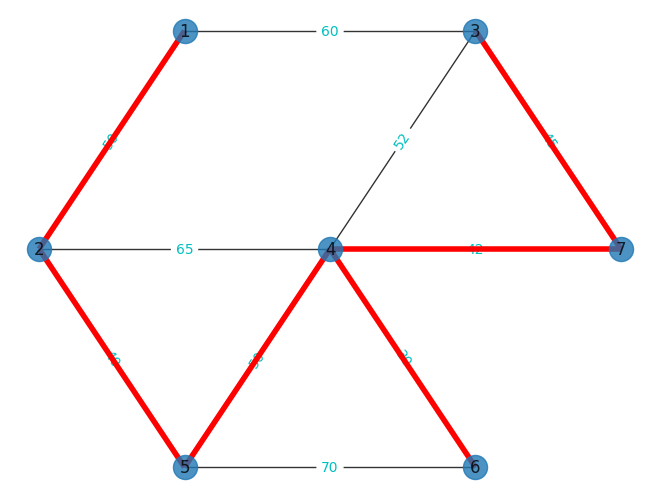

In [20]:
# networkX_E4.py
# Demo of minimum spanning tree(MST) with NetworkX
# Copyright 2021 YouCans, XUPT
# Crated：2021-05-21

import matplotlib.pyplot as plt # 导入 Matplotlib 工具包
import networkx as nx  # 导入 NetworkX 工具包

G = nx.Graph()  # 创建：空的 无向图
G.add_weighted_edges_from([(1,2,50),(1,3,60),(2,4,65),(2,5,40),(3,4,52),
                (3,7,45),(4,5,50),(4,6,30),(4,7,42),(5,6,70)])  # 向图中添加多条赋权边: (node1,node2,weight)

T = nx.minimum_spanning_tree(G)  # 返回包括最小生成树的图
print(T.nodes)  # [1, 2, 3, 4, 5, 7, 6]
print(T.edges)  # [(1,2), (2,5), (3,7), (4,6), (4,7), (4,5)]
print(sorted(T.edges)) # [(1,2), (2,5), (3,7), (4,5), (4,6), (4,7)]
mst1 = nx.tree.minimum_spanning_edges(G, algorithm="kruskal") # 返回值 带权的边
print(list(mst1))
# [(4,6,{'weight':30}), (2,5,{'weight':40}), (4,7,{'weight':42}), (3,7,{'weight':45}), (1,2,{'weight':50}), (4,5,{'weight':50})]
mst2 = nx.tree.minimum_spanning_edges(G, algorithm="prim")  # data=False 表示返回值不带权
print(list(mst2))
# [(1,2), (2,5), (5,4), (4,6), (4,7), (7,3)]

pos={1:(2.5,10),2:(0,5),3:(7.5,10),4:(5,5),5:(2.5,0),6:(7.5,0),7:(10,5)}  # 指定顶点位置
nx.draw(G, pos, with_labels=True, alpha=0.8)  # 绘制无向图
labels = nx.get_edge_attributes(G,'weight')  # YouCans, XUPT
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_color='c') # 显示边的权值
nx.draw_networkx_edges(G,pos,edgelist=T.edges,edge_color='r',width=4)  # 设置指定边的颜色
plt.show()


Nodes of MST (Kruskal): [1, 2, 3, 4, 5, 7, 6]
Edges of MST (Kruskal): [(1, 2), (2, 5), (3, 7), (4, 6), (4, 7), (4, 5)]
Sorted Edges of MST (Kruskal): [(1, 2), (2, 5), (3, 7), (4, 5), (4, 6), (4, 7)]
MST Edges (Kruskal with weights): [(4, 6, {'weight': 30}), (2, 5, {'weight': 40}), (4, 7, {'weight': 42}), (3, 7, {'weight': 45}), (1, 2, {'weight': 50}), (4, 5, {'weight': 50})]
MST Edges (Prim): [(1, 2), (2, 5), (5, 4), (4, 6), (4, 7), (7, 3)]


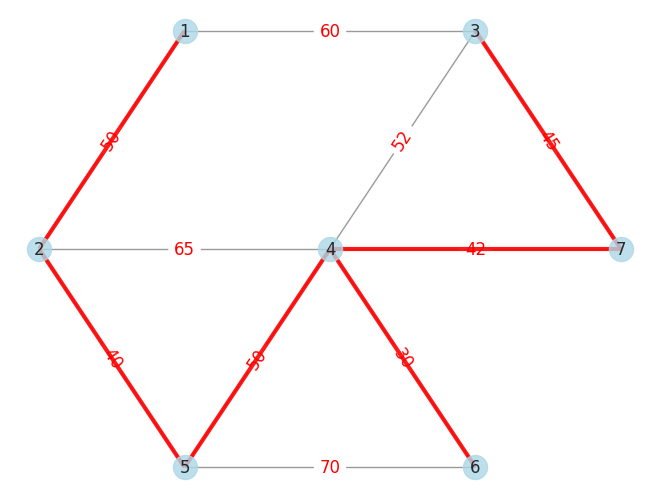

In [24]:
import matplotlib.pyplot as plt  
import networkx as nx  
  
# 创建带权边的列表  
weighted_edges = [(i, j, weight) for i, j, weight in [  
    (1, 2, 50), (1, 3, 60), (2, 4, 65), (2, 5, 40), (3, 4, 52),  
    (3, 7, 45), (4, 5, 50), (4, 6, 30), (4, 7, 42), (5, 6, 70)  
]]  
  
# 创建无向图并添加边  
def create_and_add_edges(G):  
    G.add_weighted_edges_from(weighted_edges)  
    return G  
  
# 计算最小生成树  
def calculate_mst(G):  
    mst_kruskal = nx.minimum_spanning_tree(G)  
    mst_edges_kruskal = list(nx.tree.minimum_spanning_edges(G, algorithm="kruskal"))  
    mst_prim = list(nx.tree.minimum_spanning_edges(G, algorithm="prim", data=False))  
    return mst_kruskal, mst_edges_kruskal, mst_prim  
  
# 创建图  
G = create_and_add_edges(nx.Graph())  
  
# 计算最小生成树  
mst_kruskal, mst_edges_kruskal, mst_prim = calculate_mst(G)  
  
# 打印节点和边  
print("Nodes of MST (Kruskal):", mst_kruskal.nodes)  
print("Edges of MST (Kruskal):", mst_kruskal.edges)  
print("Sorted Edges of MST (Kruskal):", sorted(mst_kruskal.edges))  
print("MST Edges (Kruskal with weights):", mst_edges_kruskal)  
print("MST Edges (Prim):", mst_prim)  
  
# 指定顶点位置  
pos = {  
    1: (2.5, 10), 2: (0, 5), 3: (7.5, 10), 4: (5, 5),   
    5: (2.5, 0), 6: (7.5, 0), 7: (10, 5)  
}  
  
# 绘制图形  
nx.draw(G, pos, with_labels=True, alpha=0.8, node_color='lightblue', edge_color='gray')  
labels = nx.get_edge_attributes(G, 'weight')  
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=12)  
nx.draw_networkx_edges(G, pos, edgelist=mst_kruskal.edges, edge_color='red', width=3, alpha=0.9)  
  
# 显示图形  
plt.axis('off')  # 不显示坐标轴  
plt.show()